In [1]:
import matplotlib.pyplot as plt 
import numpy as np



%matplotlib inline



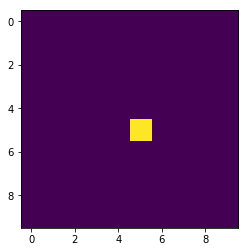

In [37]:


a = np.zeros((10,10))


a[5,5] = 1

plt.imshow(a)



In [67]:
ubar = (4.-a.shape[1]/2)/a.shape[1]
vbar = (5.-a.shape[0]/2)/a.shape[0]
print(ubar,vbar)
fl = 0.008
dist = 1.

vz = 0.1
wy = 0.


(-0.1, 0.0)


In [68]:
def calc(vz,wy, ubar, vbar, fl, z):
    return ubar/z * vz + -(fl**2 + vbar**2)/fl * wy,  vbar/z * vz - ubar*vbar/fl * wy

ubardot, vbardot = calc(vz,wy, ubar, vbar, fl, dist)

print(ubardot,vbardot)

(-0.010000000000000002, 0.0)


In [69]:
for u,v in zip(range(10),range(10)):
    ubar = (float(u)-a.shape[1]/2)/a.shape[1]
    vbar = (float(v)-a.shape[0]/2)/a.shape[0]
    print(ubar,vbar)
    print(calc(vz,wy,ubar,vbar,fl,dist))

(-0.5, -0.5)
(-0.05, -0.05)
(-0.4, -0.4)
(-0.04000000000000001, -0.04000000000000001)
(-0.3, -0.3)
(-0.03, -0.03)
(-0.2, -0.2)
(-0.020000000000000004, -0.020000000000000004)
(-0.1, -0.1)
(-0.010000000000000002, -0.010000000000000002)
(0.0, 0.0)
(0.0, 0.0)
(0.1, 0.1)
(0.010000000000000002, 0.010000000000000002)
(0.2, 0.2)
(0.020000000000000004, 0.020000000000000004)
(0.3, 0.3)
(0.03, 0.03)
(0.4, 0.4)
(0.04000000000000001, 0.04000000000000001)


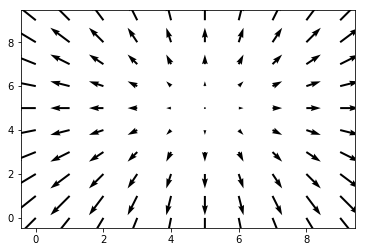

In [202]:
import itertools

x = []
y = []
result1 = np.zeros((10,10))
result2 = np.zeros((10,10))
result11=[]
result22=[]

fl = 0.08
dist = 1

vz = 1
wy = .0

for v,u in itertools.product(range(10), range(10)):
    ubar = (float(u)-a.shape[1]/2)/a.shape[1]
    vbar = (float(v)-a.shape[0]/2)/a.shape[0]
    ubardot,vbardot = calc(vz,wy,ubar,vbar,fl,dist)

    result1[v,u] = ubardot
    result2[v,u] = vbardot
    x.append(u)
    y.append(v)
    result11.append(ubardot)
    result22.append(vbardot)

plt.quiver(x,y,result1, result2)
#plt.quiver(0,0, 1, 1)

In [193]:
def deform_image(image, ubardot, vbardot):


    deformed = cv2.remap(image, ubardot.astype(np.float32), vbardot.astype(np.float32), cv2.INTER_LINEAR)

    return deformed

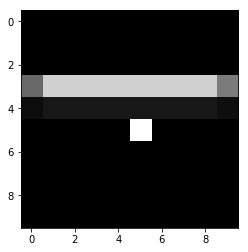

In [212]:
b =  np.zeros((10,10))
b[3, :] = 1
image = a + b
mapx_base, mapy_base = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]))

mapx = mapx_base + result1 * 1
mapy = mapy_base + result2 * 1


plt.imshow(deform_image(image, mapx, mapy), cmap='gray')

#print('{}, {}'.format(mapx, mapy))


In [253]:
import itertools

def distorcao(image, vz=1, wy=0.):

    x = []
    y = []
    result1 = np.zeros((image.height,image.width))
    result2 = np.zeros((image.height,image.width))
    result11=[]
    result22=[]

    fl = 0.08
    dist = 1


    for v,u in itertools.product(range(image.height), range(image.width)):
        ubar = (float(u)-image.width/2)/image.height
        vbar = (float(v)-image.height/2)/image.width
        ubardot,vbardot = calc(vz,wy,ubar,vbar,fl,dist)

        result1[v,u] = ubardot
        result2[v,u] = vbardot
        x.append(u)
        y.append(v)
        result11.append(ubardot)
        result22.append(vbardot)


    mapx_base, mapy_base = np.meshgrid(np.arange(image.width), np.arange(image.height))

    mapx = mapx_base + result1 * -1
    mapy = mapy_base + result2 * -1

    return deform_image(np.array(image),mapx,mapy)

    



#plt.quiver(x,y,result11, result22)
#plt.quiver(0,0, 1, 1)





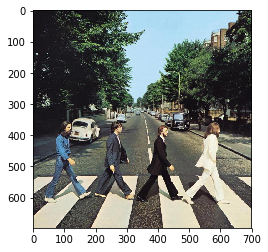

In [255]:
from PIL import Image

image = Image.open('../pedestrian/abey-road.jpg')
#/home/felipevein/Desktop/catkin_ws/src/soybot_control/scripts/pedestrian/abey-road.jpg

plt.imshow(image)

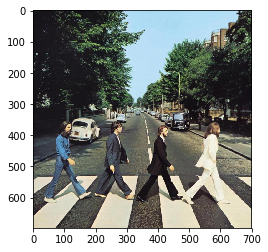

In [254]:
plt.imshow(distorcao(image, vz = 1, wy = 0.1))